### **HOMEWORK DONE BY : ADERGHAL YASSER / AMOUZIGH RHITA**

## Load and Preprocess the CIFAR10 Dataset





In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Convert labels to binary (can fly: 1, cannot fly: 0)
# Classes: airplane (0), bird (2) -> 1 (can fly)
# All other classes -> 0 (cannot fly)
fly_classes = [0, 2]
y_train_binary = np.isin(y_train, fly_classes).astype(np.int32)
y_test_binary = np.isin(y_test, fly_classes).astype(np.int32)

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split training data into training and validation sets
x_train, x_val = x_train[:40000], x_train[40000:]
y_train_binary, y_val_binary = y_train_binary[:40000], y_train_binary[40000:]


170498071/170498071 [==============================] - 10s 0us/step


## Choosing and Building the CNN Architecture


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


## Compiling the Model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Suitable for binary classification
              metrics=['accuracy'])


## Training the Model

In [ ]:
history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_val, y_val_binary))


Epoch 1/10
1250/1250 [==============================] - 63s 49ms/step - loss: 0.4294 - accuracy: 0.8197 - val_loss: 0.3618 - val_accuracy: 0.8481
Epoch 2/10
1250/1250 [==============================] - 55s 44ms/step - loss: 0.3502 - accuracy: 0.8559 - val_loss: 0.3082 - val_accuracy: 0.8762
Epoch 3/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.3168 - accuracy: 0.8697 - val_loss: 0.3044 - val_accuracy: 0.8799
Epoch 4/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.2932 - accuracy: 0.8820 - val_loss: 0.2940 - val_accuracy: 0.8809
Epoch 5/10
1250/1250 [==============================] - 56s 44ms/step - loss: 0.2732 - accuracy: 0.8902 - val_loss: 0.2709 - val_accuracy: 0.8933
Epoch 6/10
1250/1250 [==============================] - 58s 46ms/step - loss: 0.2555 - accuracy: 0.8974 - val_loss: 0.2779 - val_accuracy: 0.8917
Epoch 7/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.2349 - accuracy: 0.9056 - val_loss: 0.3027 -

## Evaluating the Model

313/313 - 7s - loss: 0.3146 - accuracy: 0.8857 - 7s/epoch - 22ms/step

Test accuracy: 0.885699987411499
313/313 [==============================] - 10s 31ms/step
Precision: 0.75551580202743
Recall: 0.6335
F1 Score: 0.6891487625781888
Accuracy: 0.8857


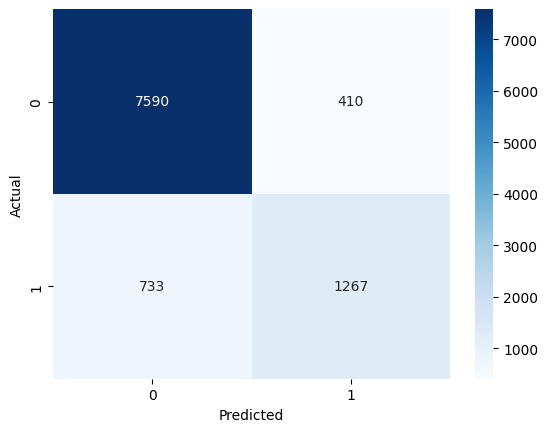

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test_binary, verbose=2)
print('\nTest accuracy:', test_acc)

# Predictions
y_pred_binary = (model.predict(x_test) > 0.5).astype("int32")

# Calculate metrics
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
